# Clustering Input prediction Data

In [1]:
import pandas as pd
import prediction_of_H_indicator_with_subCatchmentData as prediction
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Import data

In [2]:
input_data = prediction.import_input_data()
input_data

,Site,SubCatch,Slope,Elevation,LC,SAR,Area,CV,HV,HError,Rate
0,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.000000,1.0
1,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,2.0
2,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,7.0
3,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.003310,15.0
4,1,1,1.203898,8.936689,319.676414,1.000254,1648125,167,211,0.035656,21.0
...,...,...,...,...,...,...,...,...,...,...,...
6805,40,15,8.875044,224.490265,933.385135,1.006683,4387500,0,12,NaN,NaN
6806,40,16,6.585227,178.075058,700.135624,1.003876,2930625,0,20,NaN,NaN
6807,40,17,5.182087,173.802765,685.592278,1.002990,3661875,0,34,NaN,NaN
6808,40,18,4.617903,196.079285,597.577939,1.002033,5023125,0,68,NaN,NaN


In [3]:
def get_input_crits_for_list_of_selected_crits(list_crits):
    return crits_all[list_crits]

In [4]:
# Remove redundant data!!!
crits_all = input_data.iloc[:,:9]
crits_all.drop_duplicates(inplace=True)

## Choice of criteria

In [5]:
list_crits = ['Slope', 'Elevation', 'LC', 'SAR', 'Area', 'CV', 'HV'] #'Slope', 'Elevation', 'LC', 'SAR', 'Area', 'CV', 'HV'
crits = get_input_crits_for_list_of_selected_crits(list_crits)
crits

,Slope,Elevation,LC,SAR,Area,CV,HV
0,1.203898,8.936689,319.676414,1.000254,1648125,167,211
30,2.601987,35.812946,653.589956,1.000564,3954375,0,223
31,3.146334,46.627327,666.589392,1.000757,6120000,0,126
61,0.827364,7.674784,693.148995,1.000167,2480625,393,163
91,1.790146,18.949850,930.108903,1.000325,4173750,164,253
...,...,...,...,...,...,...,...
6805,8.875044,224.490265,933.385135,1.006683,4387500,0,12
6806,6.585227,178.075058,700.135624,1.003876,2930625,0,20
6807,5.182087,173.802765,685.592278,1.002990,3661875,0,34
6808,4.617903,196.079285,597.577939,1.002033,5023125,0,68


## Info about values of criteria

In [9]:
crits.values

array([[1.20389807e+00, 8.93668938e+00, 3.19676414e+02, ...,
        1.64812500e+06, 1.67000000e+02, 2.11000000e+02],
       [2.60198689e+00, 3.58129463e+01, 6.53589956e+02, ...,
        3.95437500e+06, 0.00000000e+00, 2.23000000e+02],
       [3.14633369e+00, 4.66273270e+01, 6.66589392e+02, ...,
        6.12000000e+06, 0.00000000e+00, 1.26000000e+02],
       ...,
       [5.18208742e+00, 1.73802765e+02, 6.85592278e+02, ...,
        3.66187500e+06, 0.00000000e+00, 3.40000000e+01],
       [4.61790276e+00, 1.96079285e+02, 5.97577939e+02, ...,
        5.02312500e+06, 0.00000000e+00, 6.80000000e+01],
       [2.88628507e+00, 1.15072578e+02, 1.07375833e+03, ...,
        6.97500000e+05, 0.00000000e+00, 1.40000000e+01]])

In [10]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(crits.values)
X_scaled = scaler.transform(crits.values)

array([[-1.2307279 , -1.08611116, -1.87645254, ..., -0.77747084,
         0.5019718 ,  0.51568991],
       [-0.56546199, -0.49216051,  0.12082733, ...,  0.01225101,
        -0.3655916 ,  0.59289993],
       [-0.30644027, -0.25316858,  0.19858252, ...,  0.7538191 ,
        -0.3655916 , -0.03121441],
       ...,
       [ 0.66225179,  2.5573394 ,  0.31224693, ..., -0.08790883,
        -0.3655916 , -0.62315791],
       [ 0.39379044,  3.04963836, -0.21420453, ...,  0.37821968,
        -0.3655916 , -0.40439618],
       [-0.43018168,  1.25943423,  2.63403432, ..., -1.10299034,
        -0.3655916 , -0.75184128]])

In [11]:
crits_std = pd.DataFrame(X_scaled,columns=["Slope","Elevation", "LC","SAR","Area","CV","HV"])
crits_std

,Slope,Elevation,LC,SAR,Area,CV,HV
0,-1.230728,-1.086111,-1.876453,-0.707998,-0.777471,0.501972,0.515690
1,-0.565462,-0.492161,0.120827,-0.585253,0.012251,-0.365592,0.592900
2,-0.306440,-0.253169,0.198583,-0.508861,0.753819,-0.365592,-0.031214
3,-1.409898,-1.113999,0.357447,-0.742233,-0.492401,1.676040,0.206850
4,-0.951768,-0.864826,1.774806,-0.679564,0.087371,0.486387,0.785925
...,...,...,...,...,...,...,...
439,2.419506,3.677506,1.794402,1.835380,0.160565,-0.365592,-0.764710
440,1.329921,2.651755,0.399237,0.724821,-0.338308,-0.365592,-0.713236
441,0.662252,2.557339,0.312247,0.374644,-0.087909,-0.365592,-0.623158
442,0.393790,3.049638,-0.214205,-0.004156,0.378220,-0.365592,-0.404396


In [12]:
print(X_scaled.mean(axis=0))
X_scaled.std(axis=0)

[ 1.12022503e-16 -6.40128591e-17 -1.88037774e-16  2.33246855e-14
  7.20144665e-17 -1.20024111e-17 -4.00080369e-17]


array([1., 1., 1., 1., 1., 1., 1.])

In [6]:
crits.describe(percentiles=[0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99, 0.999])

,Slope,Elevation,LC,SAR,Area,CV,HV
count,444.000000,444.000000,444.000000,444.000000,4.440000e+02,444.000000,444.000000
mean,3.790333,58.083201,633.389541,1.002043,3.918598e+06,70.373874,130.851351
std,2.103919,45.301026,167.372741,0.002531,2.923626e+06,192.710276,155.595559
min,0.205963,-1.291177,37.500000,1.000017,1.125000e+04,0.000000,0.000000
1%,0.416443,2.346409,142.053138,1.000049,1.680188e+05,0.000000,3.430000
10%,1.529903,12.351543,455.402576,1.000331,1.529438e+06,0.000000,16.000000
20%,2.139401,24.383272,522.567998,1.000494,2.084625e+06,0.000000,29.000000
30%,2.466055,30.822459,562.939682,1.000713,2.495812e+06,0.000000,43.000000
40%,2.929555,39.076736,593.408244,1.000962,3.031875e+06,0.000000,64.000000
50%,3.428588,46.599808,633.551378,1.001268,3.518438e+06,0.000000,85.500000


In [14]:
def get_k_means_for_a_nb_of_cluster(nb_cluster, crits):
    kmeans = KMeans(n_clusters = nb_cluster, init= 'k-means++')  #, n_init = 100, random_state = 99, algorithm="full"
    clusters = kmeans.fit_predict(crits)
    #print(clusters)
    taille = 444
    count_in_cluster = {}
    for cluster in range(nb_cluster):
        count_in_cluster[cluster] = list(clusters).count(cluster)
        print("Number of sub-catchment areas in cluster n°", str(cluster), ":", count_in_cluster[cluster], "=> ", (count_in_cluster[cluster]/taille)*100, "%")
    return clusters, count_in_cluster, kmeans

In [18]:
print("Without Standardization")
NB_CLUSTERS = 10
clusters, count_in_cluster, kmeans = get_k_means_for_a_nb_of_cluster(NB_CLUSTERS, crits)
print("-----------------")
print("With Standardization")
clusters_std, count_in_cluster_std, kmeans_std = get_k_means_for_a_nb_of_cluster(NB_CLUSTERS, crits_std)

Without Standardization
Number of sub-catchment areas in cluster n° 0 : 94 =>  21.17117117117117 %
Number of sub-catchment areas in cluster n° 1 : 32 =>  7.207207207207207 %
Number of sub-catchment areas in cluster n° 2 : 1 =>  0.22522522522522523 %
Number of sub-catchment areas in cluster n° 3 : 99 =>  22.2972972972973 %
Number of sub-catchment areas in cluster n° 4 : 5 =>  1.1261261261261262 %
Number of sub-catchment areas in cluster n° 5 : 16 =>  3.6036036036036037 %
Number of sub-catchment areas in cluster n° 6 : 1 =>  0.22522522522522523 %
Number of sub-catchment areas in cluster n° 7 : 43 =>  9.684684684684685 %
Number of sub-catchment areas in cluster n° 8 : 95 =>  21.396396396396398 %
Number of sub-catchment areas in cluster n° 9 : 58 =>  13.063063063063062 %
-----------------
With Standardization
Number of sub-catchment areas in cluster n° 0 : 21 =>  4.72972972972973 %
Number of sub-catchment areas in cluster n° 1 : 117 =>  26.351351351351347 %
Number of sub-catchment areas in

## Find better number of clusters

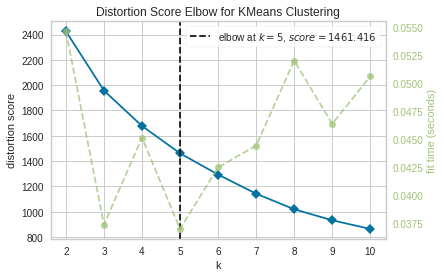

In [60]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(KMeans(), k=(2,11))
visualizer.fit(crits_std)
visualizer.show(outpath="elbowvis_std.png")

## Euclidian distance between centers of clusters

In [10]:
def get_centers_of_clusters(kmeans):
    return kmeans.cluster_centers_

In [14]:
def get_euclidian_distance_between_cluster_centers(cluster_centers):
    eucl_distance_between_centers = {}
    for num_cluster in range(len(cluster_centers)-1):
        eucl_distance_between_centers[num_cluster]={}
        for other_cluster in range(num_cluster+1, len(cluster_centers)):
            eucl_distance_between_centers[num_cluster][other_cluster] = np.linalg.norm(cluster_centers[num_cluster]-cluster_centers[other_cluster])
    print(eucl_distance_between_centers)
    return eucl_distance_between_centers

In [15]:
cluster_centers = get_centers_of_clusters(kmeans)
eucl_distance_between_centers = get_euclidian_distance_between_cluster_centers(cluster_centers)

{0: {1: 2398712.616056118, 2: 41910315.70369254, 3: 6254964.035749807}, 1: {2: 39511603.09119371, 3: 3856251.419953059}, 2: {3: 35655351.67520877}}


## Get Info on the Subcatchment area on its own cluster

In [17]:
import numpy as np
result = np.where(clusters == 2)
result[0]

array([130])

In [18]:
for index in result[0]:
    print(crits.iloc[index])

Slope        3.116750e+00
Elevation    2.632688e+01
LC           6.369502e+02
SAR          1.001400e+00
Area         4.401562e+07
CV           2.360000e+03
HV           2.035000e+03
Name: 1943, dtype: float64


## Save clusters on file

In [16]:
crits_all_std = crits_all.copy()
crits_all["clusters"] = clusters
crits_all_std["clusters"] = clusters_std

In [19]:
crits_all.to_csv("output/" + "Clusters_Sites_SubCatch" + str(NB_CLUSTERS) + ".csv", index=False)
crits_all_std.to_csv("output/" + "Clusters_Sites_SubCatch" + str(NB_CLUSTERS) + "_std" + ".csv", index=False)

## Merging with Category file

In [20]:
category = pd.read_csv("data/" + "Prediction_PMax_SubCatch_Chronicle0_Approx0_K27.32_AllSites_Slope_Elevation_LC_SAR_Area_CV_HV_Category_meeting.csv")

In [21]:
category = category.rename(columns = {'Test Site':'Site'})
category = category.rename(columns = {'SubCatchment':'SubCatch'})

In [23]:
merged = category.merge(crits_all)
merged_std = category.merge(crits_all_std)
print(merged)
print(merged_std)

     Approx  Chronicle  Site  SubCatch  MSE Test       R2 Test  P Real  \
0         0          0     1         1  0.005839  2.463035e-01      90   
1         0          0     1         3  0.030917  1.424021e-01     100   
2         0          0     1         4  0.005627  7.094419e-02      90   
3         0          0     1         5  0.768422 -4.190144e+01     100   
4         0          0     1         6  0.035940  7.552271e-02     100   
..      ...        ...   ...       ...       ...           ...     ...   
219       0          0    39         4  0.000142 -5.024079e+02    3652   
220       0          0    39         5  0.004239 -1.839583e+04    3652   
221       0          0    39         7  0.000337 -1.833014e+06    3652   
222       0          0    39         8  0.060174 -2.878078e+05    3652   
223       0          0    39         9  0.034763 -7.956023e+04    3652   

     P pred Category  Unnamed: 9 Unnamed: 10     Slope   Elevation  \
0       182        D         NaN         

In [24]:
merged_cut = merged[['Site', 'SubCatch', 'Category', 'clusters']]
merged_cut_std = merged_std[['Site', 'SubCatch', 'Category', 'clusters']]
print(merged_cut)
print(merged_cut_std)


     Site  SubCatch Category  clusters
0       1         1        D         2
1       1         3        D         9
2       1         4        D         2
3       1         5        P         0
4       1         6        D         0
..    ...       ...      ...       ...
219    39         4        G         6
220    39         5        P         8
221    39         7        G         7
222    39         8        P         8
223    39         9        P         9

[224 rows x 4 columns]
     Site  SubCatch Category  clusters
0       1         1        D         0
1       1         3        D         9
2       1         4        D         0
3       1         5        P         4
4       1         6        D         9
..    ...       ...      ...       ...
219    39         4        G         5
220    39         5        P         5
221    39         7        G         5
222    39         8        P         5
223    39         9        P         5

[224 rows x 4 columns]


In [25]:
merged.to_csv("output/" + "clusters_categories" + str(NB_CLUSTERS) + ".csv", index=False)
merged_cut.to_csv("output/" + "clusters_categories" + str(NB_CLUSTERS) + "_cut.csv", index=False)
merged_std.to_csv("output/" + "clusters_categories" + str(NB_CLUSTERS) + "_std.csv", index=False)
merged_cut_std.to_csv("output/" + "clusters_categories" + str(NB_CLUSTERS) + "_cut_std.csv", index=False)

## Repartition of prediction categories for each cluster

In [29]:
def get_repartition_category_for_clusters(merged_cut, nb_clusters):
    rep_category_by_cluster = {}
    rep_category_by_cluster_percentage = {}
    for cluster in range(nb_clusters):
        merged_cluster = merged_cut[merged_cut["clusters"]==cluster]
        rep_category_by_cluster[cluster] = {'P':0, 'G':0, 'D':0}
        rep_category_by_cluster_percentage[cluster] = {'P':0, 'G':0, 'D':0}
        for index in range(len(merged_cluster)):
            rep_category_by_cluster[cluster][merged_cluster.iloc[index, 2]] +=1
        sum_nb_site_in_cluster = sum(rep_category_by_cluster[cluster].values())
        for category in rep_category_by_cluster[cluster]:
            if sum_nb_site_in_cluster != 0:
                rep_category_by_cluster_percentage[cluster][category] = '{:.1%}'.format(float(rep_category_by_cluster[cluster][category] / sum_nb_site_in_cluster))
        
            
    #print(rep_category_by_cluster)
    print(rep_category_by_cluster_percentage)

In [30]:
get_repartition_category_for_clusters(merged_cut, NB_CLUSTERS)
print("--------------------------")
get_repartition_category_for_clusters(merged_cut_std, NB_CLUSTERS)

{0: {'P': '58.8%', 'G': '13.7%', 'D': '27.5%'}, 1: {'P': 0, 'G': 0, 'D': 0}, 2: {'P': '45.6%', 'G': '28.1%', 'D': '26.3%'}, 3: {'P': '50.0%', 'G': '0.0%', 'D': '50.0%'}, 4: {'P': '45.5%', 'G': '0.0%', 'D': '54.5%'}, 5: {'P': 0, 'G': 0, 'D': 0}, 6: {'P': '44.9%', 'G': '8.2%', 'D': '46.9%'}, 7: {'P': '52.4%', 'G': '28.6%', 'D': '19.0%'}, 8: {'P': '83.3%', 'G': '0.0%', 'D': '16.7%'}, 9: {'P': '48.1%', 'G': '3.7%', 'D': '48.1%'}}
--------------------------
{0: {'P': '40.9%', 'G': '4.5%', 'D': '54.5%'}, 1: {'P': '40.0%', 'G': '30.0%', 'D': '30.0%'}, 2: {'P': '44.4%', 'G': '0.0%', 'D': '55.6%'}, 3: {'P': '75.0%', 'G': '0.0%', 'D': '25.0%'}, 4: {'P': '62.9%', 'G': '17.1%', 'D': '20.0%'}, 5: {'P': '50.0%', 'G': '38.9%', 'D': '11.1%'}, 6: {'P': 0, 'G': 0, 'D': 0}, 7: {'P': '100.0%', 'G': '0.0%', 'D': '0.0%'}, 8: {'P': '47.4%', 'G': '5.3%', 'D': '47.4%'}, 9: {'P': '49.4%', 'G': '18.4%', 'D': '32.2%'}}


In [31]:
from sklearn import preprocessing
import pandas as pd
import prediction_of_H_indicator_with_subCatchmentData as prediction
from sklearn.cluster import KMeans
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def get_input_crits_for_list_of_selected_crits(list_crits):
    return crits_all[list_crits]

def get_k_means_for_a_nb_of_cluster(nb_cluster, crits):
    kmeans = KMeans(n_clusters = nb_cluster, init= 'k-means++')  #, n_init = 100, random_state = 99, algorithm="full"
    clusters = kmeans.fit_predict(crits)
    #print(clusters)
    taille = 444
    count_in_cluster = {}
    for cluster in range(nb_cluster):
        count_in_cluster[cluster] = list(clusters).count(cluster)
        print("Number of sub-catchment areas in cluster n°", str(cluster), ":", count_in_cluster[cluster], "=> ", (count_in_cluster[cluster]/taille)*100, "%")
    return clusters, count_in_cluster, kmeans

def get_repartition_category_for_clusters(merged_cut, nb_clusters):
    rep_category_by_cluster = {}
    rep_category_by_cluster_percentage = {}
    for cluster in range(nb_clusters):
        merged_cluster = merged_cut[merged_cut["clusters"]==cluster]
        rep_category_by_cluster[cluster] = {'P':0, 'G':0, 'D':0}
        rep_category_by_cluster_percentage[cluster] = {'P':0, 'G':0, 'D':0}
        for index in range(len(merged_cluster)):
            rep_category_by_cluster[cluster][merged_cluster.iloc[index, 2]] +=1
        sum_nb_site_in_cluster = sum(rep_category_by_cluster[cluster].values())
        for category in rep_category_by_cluster[cluster]:
            if sum_nb_site_in_cluster != 0:
                rep_category_by_cluster_percentage[cluster][category] = '{:.1%}'.format(float(rep_category_by_cluster[cluster][category] / sum_nb_site_in_cluster))
        
            
    #print(rep_category_by_cluster)
    print(rep_category_by_cluster_percentage)

def clustering(nb_clusters):
    input_data = prediction.import_input_data()
    # Remove redundant data!!!
    crits_all = input_data.iloc[:,:9]
    crits_all.drop_duplicates(inplace=True)
    list_crits = ['Slope', 'Elevation', 'LC', 'SAR', 'Area', 'CV', 'HV'] #'Slope', 'Elevation', 'LC', 'SAR', 'Area', 'CV', 'HV'
    crits = get_input_crits_for_list_of_selected_crits(list_crits)

    scaler = preprocessing.StandardScaler().fit(crits.values)
    X_scaled = scaler.transform(crits.values)
    crits_std = pd.DataFrame(X_scaled,columns=["Slope","Elevation", "LC","SAR","Area","CV","HV"])
    
    print("Without Standardization")
    clusters, count_in_cluster, kmeans = get_k_means_for_a_nb_of_cluster(nb_clusters, crits)
    print("-----------------")
    print("With Standardization")
    clusters_std, count_in_cluster_std, kmeans_std = get_k_means_for_a_nb_of_cluster(nb_clusters, crits_std)
    
    crits_all_std = crits_all.copy()
    crits_all["clusters"] = clusters
    crits_all_std["clusters"] = clusters_std
    crits_all.to_csv("output/" + "Clusters_Sites_SubCatch" + str(nb_clusters) + ".csv", index=False)
    crits_all_std.to_csv("output/" + "Clusters_Sites_SubCatch" + str(nb_clusters) + "_std" + ".csv", index=False)
    
    category = pd.read_csv("data/" + "Prediction_PMax_SubCatch_Chronicle0_Approx0_K27.32_AllSites_Slope_Elevation_LC_SAR_Area_CV_HV_Category_meeting.csv")
    category = category.rename(columns = {'Test Site':'Site'})
    category = category.rename(columns = {'SubCatchment':'SubCatch'})
    
    merged = category.merge(crits_all)
    merged_std = category.merge(crits_all_std)
    merged_cut = merged[['Site', 'SubCatch', 'Category', 'clusters']]
    merged_cut_std = merged_std[['Site', 'SubCatch', 'Category', 'clusters']]
    merged.to_csv("output/" + "clusters_categories" + str(nb_clusters) + ".csv", index=False)
    merged_cut.to_csv("output/" + "clusters_categories" + str(nb_clusters) + "_cut.csv", index=False)
    merged_std.to_csv("output/" + "clusters_categories" + str(nb_clusters) + "_std.csv", index=False)
    merged_cut_std.to_csv("output/" + "clusters_categories" + str(nb_clusters) + "_cut_std.csv", index=False)
    
    get_repartition_category_for_clusters(merged_cut, nb_clusters)
    print("--------------------------")
    get_repartition_category_for_clusters(merged_cut_std, nb_clusters)

In [32]:
clustering(15)

Without Standardization
Number of sub-catchment areas in cluster n° 0 : 25 =>  5.63063063063063 %
Number of sub-catchment areas in cluster n° 1 : 56 =>  12.612612612612612 %
Number of sub-catchment areas in cluster n° 2 : 1 =>  0.22522522522522523 %
Number of sub-catchment areas in cluster n° 3 : 1 =>  0.22522522522522523 %
Number of sub-catchment areas in cluster n° 4 : 17 =>  3.8288288288288284 %
Number of sub-catchment areas in cluster n° 5 : 46 =>  10.36036036036036 %
Number of sub-catchment areas in cluster n° 6 : 9 =>  2.027027027027027 %
Number of sub-catchment areas in cluster n° 7 : 52 =>  11.711711711711711 %
Number of sub-catchment areas in cluster n° 8 : 41 =>  9.234234234234235 %
Number of sub-catchment areas in cluster n° 9 : 11 =>  2.4774774774774775 %
Number of sub-catchment areas in cluster n° 10 : 50 =>  11.26126126126126 %
Number of sub-catchment areas in cluster n° 11 : 39 =>  8.783783783783784 %
Number of sub-catchment areas in cluster n° 12 : 60 =>  13.51351351351